In [ ]:
sns.pairplot(df_train[cols], size = 2.5)
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

# Propensity Model 

https://www.kaggle.com/datasets/benpowis/customer-propensity-to-purchase-data  
Scoring customer propensity to purchase.  
A propensity model is a predictive model that estimates the probability of a specific customer behavior, such as making a purchase, churning, or responding to a campaign.  
In this case, the model predicts each visitor’s propensity to purchase based on their observed actions and attributes during a website visit.  
The output is a probability score for each customer, which businesses can use to prioritize high-propensity segments for targeted marketing or retention strategies.

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [7]:
df_test = pd.read_csv('testing_sample.csv')
df_train = pd.read_csv('training_sample.csv')

In [119]:
df_train.shape, df_test.shape, df_test.UserID.isin(df_train.UserID).sum()

((455401, 25), (151655, 26), 0)

In [8]:
df_train.head().T

,0,1,2,3,4
UserID,a720-6b732349-a720-4862-bd21-644732,a0c0-6b73247c-a0c0-4bd9-8baa-797356,86a8-6b735c67-86a8-407b-ba24-333055,6a3d-6b736346-6a3d-4085-934b-396834,b74a-6b737717-b74a-45c3-8c6a-421140
basket_icon_click,0,0,0,0,0
basket_add_list,0,0,0,0,1
basket_add_detail,0,0,0,0,0
sort_by,0,0,0,0,1
image_picker,0,0,0,0,0
account_page_click,0,0,0,0,0
promo_banner_click,0,0,0,0,0
detail_wishlist_add,0,0,0,0,0
list_size_dropdown,0,0,0,0,1


In [9]:
df_train.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,...,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,...,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,...,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


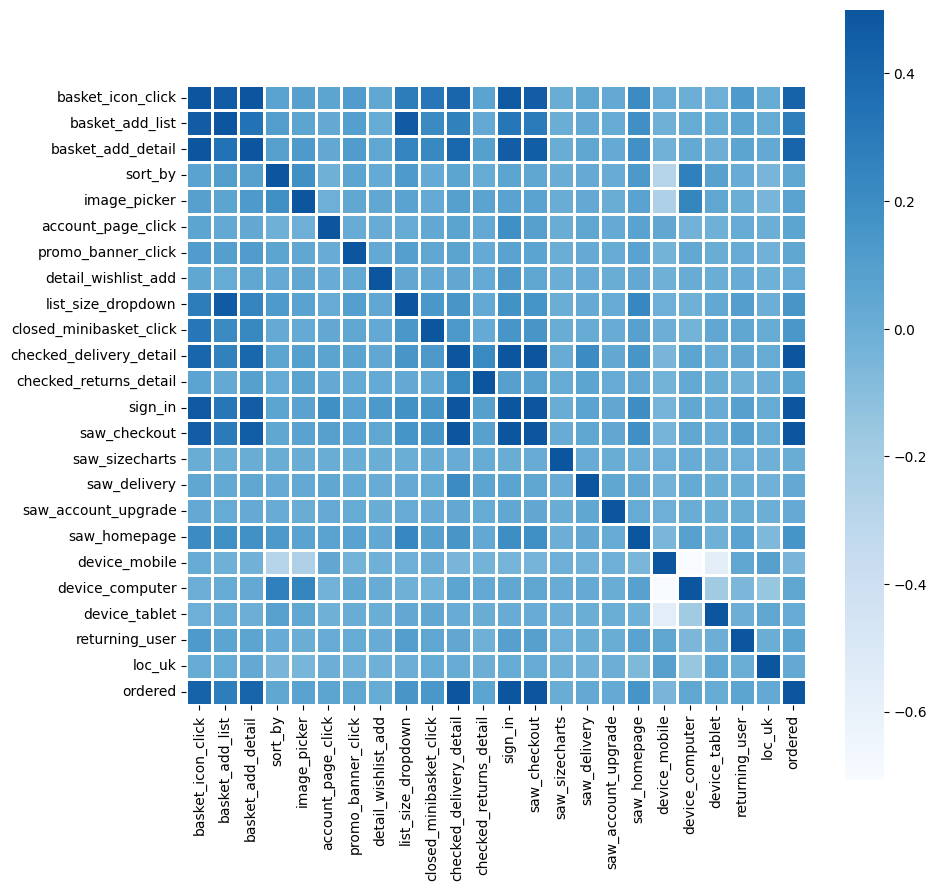

In [71]:
corr = df_train.drop('UserID', axis=1).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=0.5, center=0, square=True, linewidths=1, cmap='Blues')
plt.show()

#### The heatmap shows that basket and checkout actions are strongly linked to purchases, confirming these features give away the answer too easily — so I removed them to avoid cheating.

In [110]:
X_train_full = df_train.drop(columns=['UserID', 'ordered', 'device_mobile', 'sign_in', 
        'saw_checkout', 'detail_wishlist_add', 'basket_icon_click', 'basket_add_list', 'basket_add_detail', 'closed_minibasket_click'])
y_train_full = df_train['ordered']

X_test = df_test.drop(columns=['UserID', 'ordered', 'device_mobile', 'order_proba', 'sign_in', 
        'saw_checkout', 'detail_wishlist_add', 'basket_icon_click', 'basket_add_list', 'basket_add_detail', 'closed_minibasket_click'])
y_test = df_test['ordered']

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

In [111]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [113]:
y_pred_proba = model.predict_proba(X_val)[:,1]
y_pred = model.predict(X_val)
roc_auc = roc_auc_score(y_val, y_pred)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.95


#### After removing potentially misleading data, the model still performs very well (95%), showing it can effectively identify who will buy vs. who won't.

In [142]:
df_test['order_proba'] = model.predict_proba(X_test)[:,1]

In [150]:
threshold = df_test.order_proba.quantile(0.90)
df_test['high_propensity'] = (df_test['order_proba'] >= threshold).astype(int)
df_test[df_test['high_propensity']==1].head(3)

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered,order_proba,high_propensity
5,7j3d-j382-47157j3d-j382-4d3b-955343,1,0,1,0,0,0,0,1,1,...,0,0,0,0,1,1,0,0,0.584277,1
8,1397-7143-47171397-7143-4969-95351,1,1,1,0,0,0,0,0,1,...,0,1,1,0,0,1,1,0,0.001675,1
23,743b-08d2-4717743b-08d2-4634-230774,1,1,1,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0.555529,1


In [116]:
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', ascending=False)
coef_df

,feature,coefficient
5,checked_delivery_detail,8.357989
14,loc_uk,1.062476
10,saw_homepage,0.943907
13,returning_user,0.682174
4,list_size_dropdown,0.599476
11,device_computer,0.440920
12,device_tablet,0.379052
2,account_page_click,0.135041
3,promo_banner_click,0.069180
7,saw_sizecharts,0.033426


#### The logistic regression shows checked_delivery_detail, loc_uk, and saw_homepage are the strongest positive drivers of purchase propensity, while saw_delivery and checked_returns_detail are negatively associated with purchasing.

# Summary
### Recommendations from Logistic Regression 

1. Make delivery information easier to find and understand, since users who check it are more likely to buy.

2. Focus marketing efforts on returning users and UK visitors - they're more likely to buy. Personalize content and offers.

3. Improve the delivery and returns FAQ pages. Users who visit them often are less likely to buy, which suggests these pages may be confusing or worrying.

4. Create targeted campaigns (emails, ads, special offers) for users most likely to buy. Then run an A/B test to measure how much better these targeted campaigns perform versus random targeting.

In [123]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [124]:
y_pred_proba = rf.predict_proba(X_val)[:,1]
y_pred = rf.predict(X_val)
roc_auc = roc_auc_score(y_val, y_pred)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.98


In [125]:
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)
importances

,feature,importance
5,checked_delivery_detail,0.780730
10,saw_homepage,0.085662
4,list_size_dropdown,0.085455
13,returning_user,0.012721
1,image_picker,0.007208
6,checked_returns_detail,0.006571
14,loc_uk,0.005658
0,sort_by,0.004645
11,device_computer,0.004457
3,promo_banner_click,0.003734


#### The random forest model achieved a high ROC AUC of 0.98, indicating excellent predictive performance. Feature importance analysis highlights checked_delivery_detail as the dominant predictor of purchase propensity, followed by saw_homepage and list_size_dropdown, with much smaller contributions from other features.

In [134]:
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, scale_pos_weight=24)
xgb.fit(X_train, y_train)
y_pred_proba = xgb.predict_proba(X_val)[:,1]
y_pred = xgb.predict(X_val)
roc_auc = roc_auc_score(y_val, y_pred)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.98


The XGBoost model correctly predicted purchases 98% of the time, performing just as well as the random forest model.